<a href="https://colab.research.google.com/github/AjaniBilby/41043-Natural-Language-Processing/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from keras.utils import to_categorical
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("/content/drive/MyDrive/NLPProject/data.csv")

# Define a mapping from string labels to integer labels
label_map = {"age": 0, "ethnicity": 1, "gender": 2, "not_cyberbullying": 3, "other_cyberbullying": 4, "religion": 5}

# Convert the string labels to integer labels
data["cyberbullying_type"] = data["cyberbullying_type"].map(label_map)

# Split the data into training, validation, and testing sets
train_data = data.sample(frac=0.8, random_state=42)
val_data = data.drop(train_data.index).sample(frac=0.5, random_state=42)
test_data = data.drop(train_data.index).drop(val_data.index)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["tweet_text"])
X_train = tokenizer.texts_to_sequences(train_data["tweet_text"])
X_val = tokenizer.texts_to_sequences(val_data["tweet_text"])
X_test = tokenizer.texts_to_sequences(test_data["tweet_text"])

# Pad the sequences to a fixed length
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# One-hot encode the target labels
y_train = to_categorical(train_data["cyberbullying_type"], num_classes=6)
y_val = to_categorical(val_data["cyberbullying_type"], num_classes=6)
y_test = to_categorical(test_data["cyberbullying_type"], num_classes=6)

In [ ]:
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(5000, 100, input_length=100))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(6, activation='softmax', kernel_regularizer=l2(0.01)))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
          epochs=25, batch_size=32)


# Evaluate the performance on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy*100))


Epoch 1/25
1193/1193 [==============================] - 32s 26ms/step - loss: 0.7620 - categorical_accuracy: 0.7386 - val_loss: 0.6098 - val_categorical_accuracy: 0.7995
Epoch 2/25
1193/1193 [==============================] - 14s 12ms/step - loss: 0.4862 - categorical_accuracy: 0.8374 - val_loss: 0.5569 - val_categorical_accuracy: 0.8134
Epoch 3/25
1193/1193 [==============================] - 9s 8ms/step - loss: 0.4306 - categorical_accuracy: 0.8572 - val_loss: 0.5227 - val_categorical_accuracy: 0.8192
Epoch 4/25
1193/1193 [==============================] - 8s 6ms/step - loss: 0.4009 - categorical_accuracy: 0.8663 - val_loss: 0.5042 - val_categorical_accuracy: 0.8226
Epoch 5/25
1193/1193 [==============================] - 6s 5ms/step - loss: 0.3758 - categorical_accuracy: 0.8737 - val_loss: 0.4980 - val_categorical_accuracy: 0.8253
Epoch 6/25
1193/1193 [==============================] - 7s 6ms/step - loss: 0.3611 - categorical_accuracy: 0.8790 - val_loss: 0.4815 - val_categorical_accur

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          500000    
                                                                 
 conv1d_2 (Conv1D)           (None, 100, 32)           9632      
                                                                 
 dropout_2 (Dropout)         (None, 100, 32)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 50, 32)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                102464    
                                                      

[0.7620139718055725, 0.48619386553764343, 0.4306453764438629, 0.40094366669654846, 0.37576210498809814, 0.36109909415245056, 0.3446651101112366, 0.334538072347641, 0.3229542374610901, 0.3107701241970062, 0.30617931485176086, 0.29985854029655457, 0.29096701741218567, 0.2880728244781494, 0.2830323874950409, 0.2782585620880127, 0.27301374077796936, 0.2679745554924011, 0.2626729905605316, 0.25990426540374756, 0.26022833585739136, 0.24868033826351166, 0.24853722751140594, 0.24679405987262726, 0.24234773218631744]
[0.6097825169563293, 0.5569019913673401, 0.5226882100105286, 0.5041679739952087, 0.49801790714263916, 0.4814847707748413, 0.5020318627357483, 0.4966012239456177, 0.5082970261573792, 0.5121920108795166, 0.5062956809997559, 0.4963829517364502, 0.5097491145133972, 0.5251685380935669, 0.5341139435768127, 0.5418838262557983, 0.5365321636199951, 0.5347673296928406, 0.5542212724685669, 0.5676203966140747, 0.5723905563354492, 0.5649623870849609, 0.5782147645950317, 0.5877327919006348, 0.58

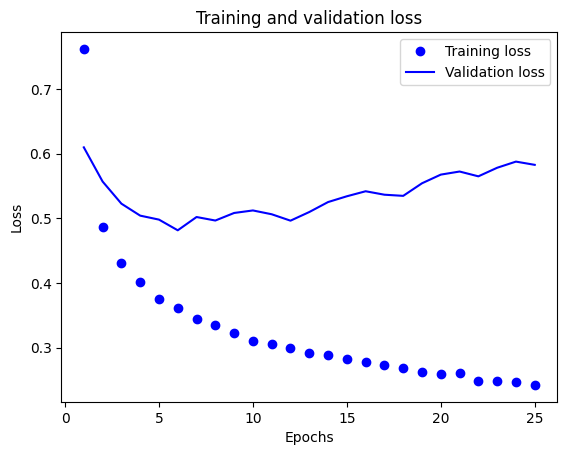

[0.7386119365692139, 0.837448239326477, 0.8572364449501038, 0.8662525415420532, 0.87372225522995, 0.8789641857147217, 0.8806416392326355, 0.8847827315330505, 0.8902605175971985, 0.8930649757385254, 0.8947161436080933, 0.8969177603721619, 0.9006133079528809, 0.9011113047599792, 0.9018975496292114, 0.9045447111129761, 0.9082927107810974, 0.9103632569313049, 0.9105467200279236, 0.9123814105987549, 0.9104418754577637, 0.9146616458892822, 0.917335033416748, 0.9165225028991699, 0.9174660444259644]
[0.7995386719703674, 0.813378095626831, 0.8192493319511414, 0.8226042985916138, 0.8253302574157715, 0.8251205682754517, 0.8211365342140198, 0.8171524405479431, 0.816103994846344, 0.8152652382850647, 0.8219752311706543, 0.8217655420303345, 0.8211365342140198, 0.8152652382850647, 0.8175718188285828, 0.8079261779785156, 0.8114908933639526, 0.8083455562591553, 0.8089746236801147, 0.8117005825042725, 0.8026840090751648, 0.8085552453994751, 0.8093940019607544, 0.8077164888381958, 0.8066680431365967]


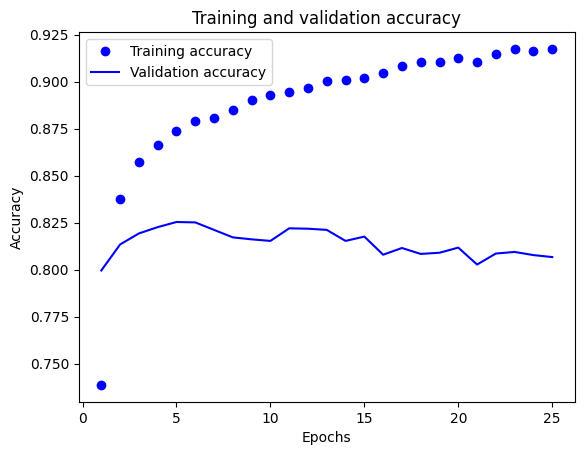

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss and accuracy
epochs = range(1, len(history.history['loss']) + 1)
print(history.history['loss'])
print(history.history['val_loss'])
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(history.history['categorical_accuracy'])
print(history.history['val_categorical_accuracy'])
plt.plot(epochs, history.history['categorical_accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history.history['val_categorical_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

150/150 [==============================] - 1s 4ms/step
Confusion matrix, without normalization


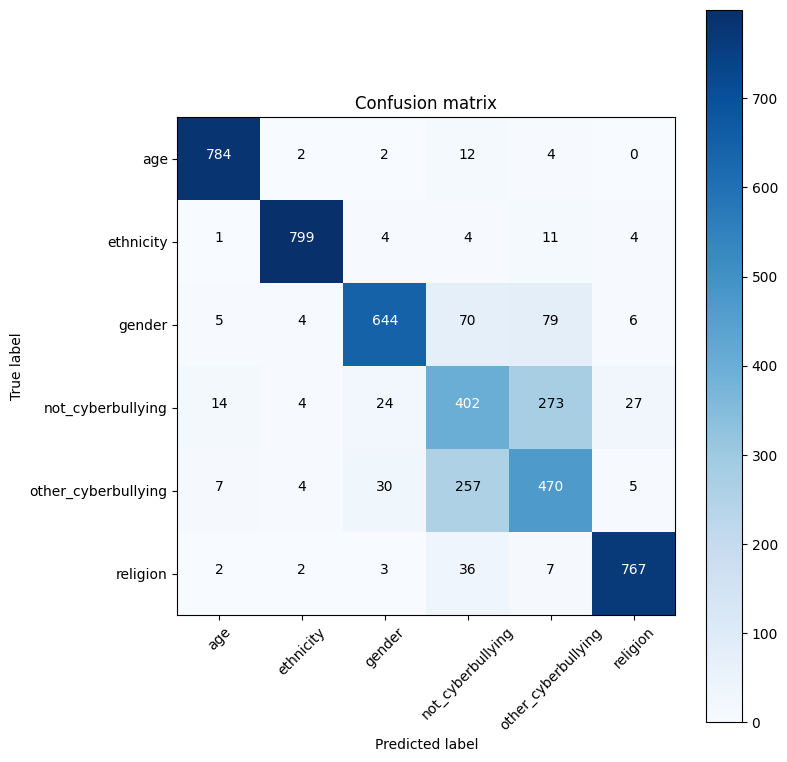

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# Generate predictions on test set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1)

# Define label names
label_names = ['age', 'ethnicity', 'gender', 'not_cyberbullying', 'other_cyberbullying', 'religion']

# Generate confusion matrix
conf_matrix = confusion_matrix(test_data["cyberbullying_type"], y_pred)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    # Create plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Format labels as percentages
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    # Add axis labels and title
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(conf_matrix, label_names, normalize=False)
plt.show()


150/150 [==============================] - 1s 4ms/step
Confusion matrix, without normalization


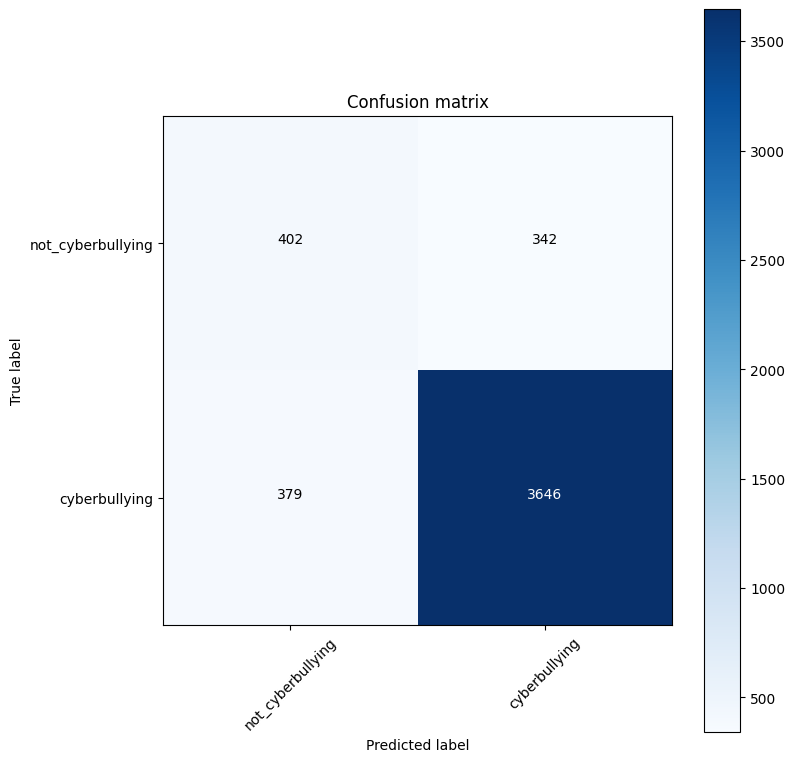

In [ ]:
# Generate predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1)

# Define label names
label_names = ['age', 'ethnicity', 'gender', 'not_cyberbullying', 'other_cyberbullying', 'religion']

# Define the indices for the combined category and "not_cyberbullying"
combined_idx = [label_names.index(label) for label in ['age', 'ethnicity', 'gender', 'other_cyberbullying', 'religion']]
not_bullying_idx = label_names.index('not_cyberbullying')

# Combine the predicted labels for the combined category
combined_pred = np.where(np.isin(y_pred, combined_idx), len(label_names) - 1, y_pred)

# Combine the true labels for the combined category
combined_true = np.where(np.isin(test_data["cyberbullying_type"], combined_idx), len(label_names) - 1, test_data["cyberbullying_type"])

# Generate confusion matrix
conf_matrix = confusion_matrix(combined_true, combined_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(conf_matrix, ['not_cyberbullying', 'cyberbullying'], normalize=False)
plt.show()

In [ ]:
model.save('model.h5')